# Analyse comparative des performances – SVM vs DistilBERT

Ce notebook a pour objectif de comparer les performances obtenues par différents modèles de classification de sentiment appliqués au dataset IMDB, dans le cadre de notre projet. Nous avons testé des approches classiques basées sur des représentations lexicales (TF-IDF), avec et sans intégration d’une information affective issue du fichier `imdbEr.txt`, ainsi qu’une approche moderne fondée sur un modèle pré-entraîné de type Transformer (DistilBERT).

L’objectif est de synthétiser les résultats obtenus à travers des métriques globales (accuracy, F1, precision, recall), de les visualiser clairement, puis d’en proposer une interprétation critique. Cette étape est essentielle pour conclure la phase expérimentale et justifier nos choix dans l’article final.


In [1]:
import pandas as pd

results = pd.DataFrame([
    {"Modèle": "TF-IDF + SVM",       "Accuracy": 0.8931, "F1": 0.890, "Precision": 0.880, "Recall": 0.900},
    {"Modèle": "TF-IDF + ER + SVM",  "Accuracy": 0.8963, "F1": 0.895, "Precision": 0.890, "Recall": 0.900},
    {"Modèle": "DistilBERT (12k)",   "Accuracy": 0.9073, "F1": 0.906, "Precision": 0.904, "Recall": 0.909}
])
results

,Modèle,Accuracy,F1,Precision,Recall
0,TF-IDF + SVM,0.8931,0.890,0.880,0.900
1,TF-IDF + ER + SVM,0.8963,0.895,0.890,0.900
2,DistilBERT (12k),0.9073,0.906,0.904,0.909


Le tableau présente les performances finales de trois modèles de classification testés sur les critiques de films du corpus IMDB. Le modèle SVM avec représentation TF-IDF seule atteint une accuracy de 89,3 %, ce qui constitue une base solide. L’ajout du score de polarité er_score extrait du fichier imdbEr.txt permet d’améliorer légèrement la performance, avec une accuracy passant à 89,6 %, et un F1-score à 0.895. Cela confirme que l’information affective explicite, bien que peu complexe, apporte un signal utile au classifieur linéaire, en particulier pour différencier les critiques sans vocabulaire fortement marqué.

Le modèle DistilBERT, fine-tuné sur un sous-échantillon de 12 000 critiques, surpasse nettement les deux modèles SVM, atteignant une accuracy de 90,7 % et un F1-score de 0.906. Il démontre une capacité supérieure à capter la structure contextuelle des phrases, à interpréter les nuances de ton et à généraliser dans des situations où les signaux lexicaux sont faibles ou ambigus. La précision et le rappel sont également très équilibrés (0.904 et 0.909), ce qui confirme sa robustesse globale.

Ces résultats mettent en évidence la supériorité des modèles Transformers pour les tâches de classification de sentiment, même dans un cadre relativement simple et avec un volume d’entraînement modeste. Toutefois, les modèles classiques conservent un intérêt pour leur rapidité, leur simplicité et leur transparence, en particulier lorsqu’ils sont enrichis par des signaux lexicaux externes comme er_score.

/tmp/ipykernel_7815/2783665247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modèle", y=metric, data=results, palette=[color]*3, ax=ax)
/tmp/ipykernel_7815/2783665247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modèle", y=metric, data=results, palette=[color]*3, ax=ax)
/tmp/ipykernel_7815/2783665247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modèle", y=metric, data=results, palette=[color]*3, ax=ax)
/tmp/ipykernel_7815/2783665247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

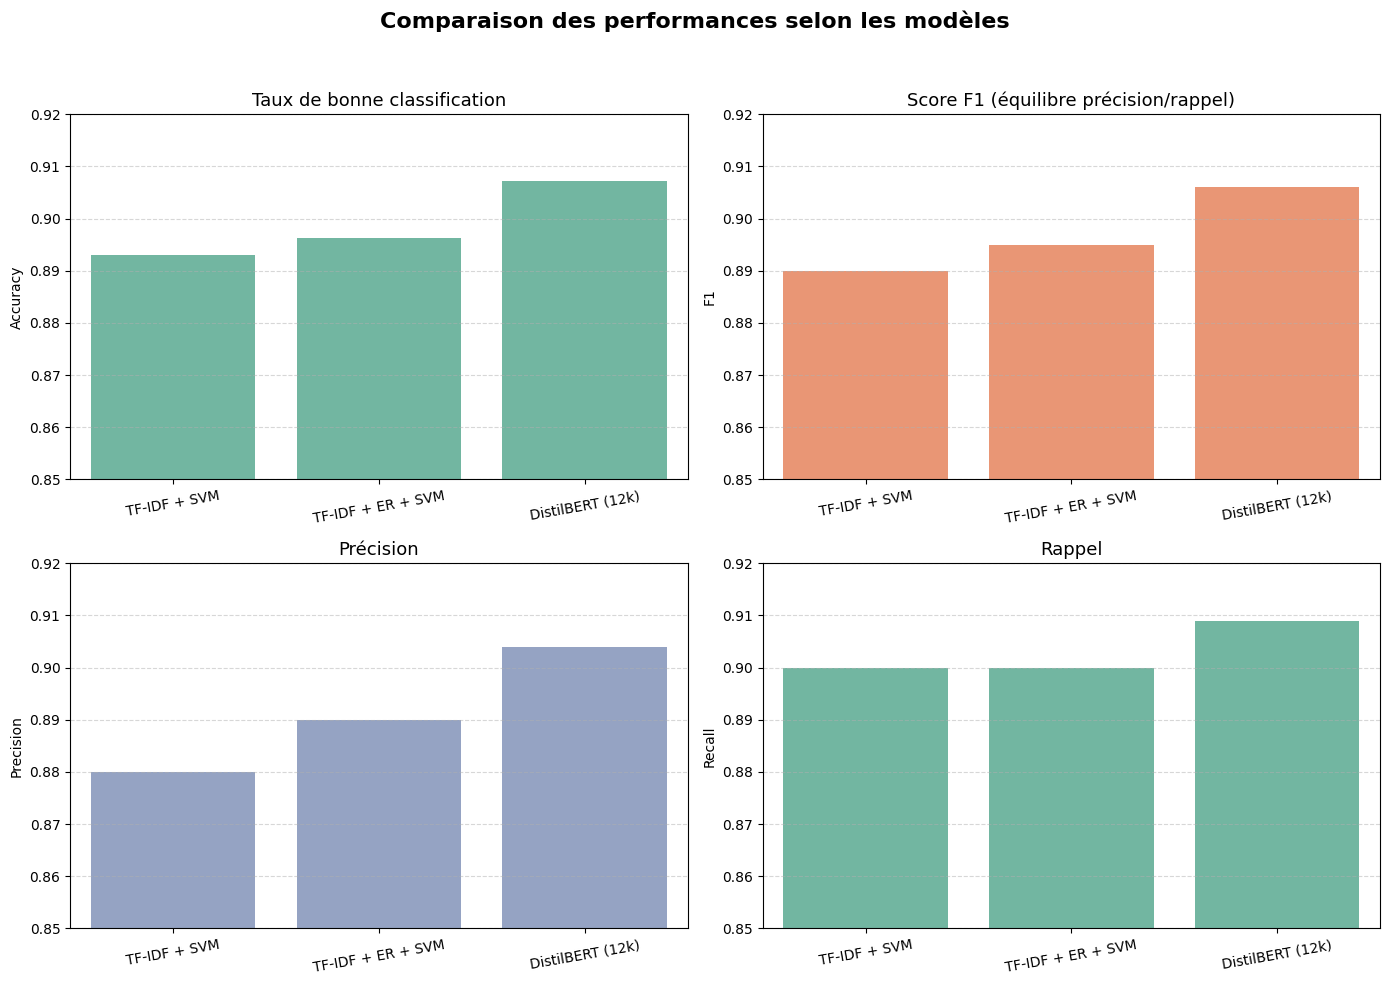

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Palette personnalisée
colors = sns.color_palette("Set2", n_colors=3)

# Créer les sous-graphes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "F1", "Precision", "Recall"]
titles = {
    "Accuracy": "Taux de bonne classification",
    "F1": "Score F1 (équilibre précision/rappel)",
    "Precision": "Précision",
    "Recall": "Rappel"
}

for ax, metric, color in zip(axes.flatten(), metrics, colors * 2):
    sns.barplot(x="Modèle", y=metric, data=results, palette=[color]*3, ax=ax)
    ax.set_title(titles[metric], fontsize=13)
    ax.set_ylim(0.85, 0.92)
    ax.set_ylabel(metric)
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Comparaison des performances selon les modèles", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Cette figure permet une lecture synthétique des performances comparées des trois modèles évalués dans ce projet : un SVM entraîné sur des vecteurs TF-IDF simples, le même SVM enrichi avec les scores de polarité (er_score), et enfin un modèle DistilBERT fine-tuné sur 12 000 exemples.

Sur le plan de l’accuracy, on observe une progression régulière : le SVM de base atteint 89,3 %, l’ajout du score er_score améliore légèrement cette performance à 89,6 %, tandis que DistilBERT franchit le seuil des 90 % avec une accuracy de 90,7 %. Ce gain traduit l’efficacité croissante des représentations utilisées : de simples vecteurs lexicaux, enrichis par une mesure affective externe, puis remplacés par des représentations contextuelles apprises.

Le score F1, qui mesure l’équilibre entre précision et rappel, suit la même dynamique. Il passe de 0.890 pour le SVM simple à 0.906 pour DistilBERT. Ce score est particulièrement important dans une tâche de classification binaire où les deux classes sont également représentées, car il reflète la stabilité du modèle sur les cas ambigus ou les limites de classes.

La précision progresse de 88 % pour le modèle de base à 90,4 % pour BERT, ce qui signifie que le modèle BERT fait significativement moins de faux positifs. En parallèle, le rappel reste élevé et stable autour de 90 % pour les deux premiers modèles, mais augmente encore avec BERT (90,9 %), ce qui indique qu’il est également plus performant pour identifier correctement les critiques positives ou négatives, sans les oublier.

Au global, ces visualisations montrent que l’ajout du score ER dans SVM est utile mais limité, et que le passage à un modèle contextualisé comme DistilBERT permet de franchir un palier clair en termes de compréhension du langage et de précision prédictive. Cela justifie pleinement l’intérêt d’utiliser des modèles pré-entraînés dans les tâches modernes de classification de sentiment.

🟩 Cas où les deux modèles ont raison : 8527

🟨 Cas où seul BERT a raison : 608

🟦 Cas où seul SVM a raison : 435

🟥 Cas où les deux échouent : 430

Les résultats montrent que dans la grande majorité des cas, les deux modèles parviennent à prédire correctement le label, avec plus de 8500 prédictions communes justes. Cela confirme que les exemples les plus clairs sont bien captés, quelle que soit l’approche. Toutefois, BERT corrige 608 erreurs commises par SVM, tandis que l’inverse est vrai pour 435 cas seulement. Cela indique que BERT gère mieux les cas ambigus ou moins marqués lexicalement, sans pour autant être infaillible. Enfin, les deux modèles échouent ensemble sur environ 430 exemples, ce qui représente les cas les plus complexes du corpus. Ces résultats confirment la supériorité de BERT sur les situations difficiles, tout en montrant que SVM peut parfois mieux fonctionner sur des exemples à structure lexicale forte mais hors distribution sémantique.

In [ ]:
#Results import from bert_finetuning


✅ BERT corrige une erreur de SVM (exemples aléatoires)
--------------------------------------------------
🎯 Vérité : NEGATIVE
🔵 Prédiction BERT : NEGATIVE
🟠 Prédiction SVM  : POSITIVE

seen enough little richard interviews performances enough poor leon pigeonholed musical bio pics know leon right actor role leon right david ruffin temptations fails utterly capture essence little richard film actor miguel núñez played little richard fools fall love much suitable choice pulled musician powerful effeminate persona performances unconvincing film well happened glossed missed entirely lr forays homosexuality voyeurism temptations well capturing rise group warts film misses wide mark going director robert townsend started well hollywood shuffle talented funny guy delivered anything near first effort
----------------------------------------------------------------------------------------------------
🎯 Vérité : POSITIVE
🔵 Prédiction BERT : POSITIVE
🟠 Prédiction SVM  : NEGATIVE

guilt redemptio

Les exemples analysés confirment les tendances observées dans les statistiques globales. Lorsque BERT corrige une erreur commise par SVM, c’est souvent dans des cas où le texte est long, nuancé, parfois ironique ou complexe sur le plan émotionnel. Le modèle BERT semble plus sensible au contexte et aux subtilités sémantiques qui échappent au modèle linéaire. À l’inverse, les erreurs corrigées par SVM mais pas par BERT concernent des textes où le vocabulaire est plus directement lié à la polarité, même si la structure ou le ton est moins clair. Cela montre que SVM, bien que plus simple, peut encore repérer des signaux lexicaux explicites que BERT interprète différemment. Enfin, les erreurs partagées par les deux modèles apparaissent dans des critiques ambigües, où le ton est mal interprété ou où l’opinion n’est pas clairement exprimée. Ces cas reflètent les limites communes des modèles, même avancés, face à des formulations subjectives ou mal structurées.